In [1]:
import mysql.connector
from mysql.connector import Error

connection = mysql.connector.connect(
  host="203.145.218.196",
  user="user",
  password="user",
  database="mydb"
)

In [36]:
data = connection.cursor()
data.execute("SELECT * FROM tb_sensor WHERE sensor_id = '3'") # and timestamp >= '2022-06-25 02:02:38'
myresult = data.fetchall()
len(myresult)

63178

In [10]:
from datetime import datetime, timedelta
timestamp_new_all =[]
peaktopeak_value_all =[]
label_all=[]
#data1=[]#"'timestamp_new'","min_value","max_value","avg_value","peaktopeak_value","label"
class_0=0 #count class 0
class_1=0 #count class 1

for x in myresult:
    #print(x)
    timestamp_new  = x[0]
    timestamp_new_all.append(timestamp_new)
    peaktopeak_value = x[5]
    peaktopeak_value_all.append(peaktopeak_value)
    
    if (x[5]>=0.00396538 and x[5]<0.316929):
        label = '1'
        label_all.append(label)
        class_1 += 1
    else:
        label = '0'
        label_all.append(label)
        class_0 += 1
    #print (x)
    mycursor = connection.cursor()
    sql = "INSERT INTO tb_closet (timestamp_new, peaktopeak_value, label) VALUES ('" + str(timestamp_new) + "', " + str(peaktopeak_value) + ", " + str(label) + ")"
    mycursor.execute(sql)
    connection.commit()


In [11]:
from IPython.display import display
import pandas as pd

dict = {'timestamp' : timestamp_new_all,
        'peaktopeak' : peaktopeak_value_all,
        'label' : label_all}
df = pd.DataFrame(dict)

In [12]:
df.head()

,timestamp,peaktopeak,label
0,2022-06-16 09:05:35,0.003050,0
1,2022-06-16 09:05:39,0.003355,0
2,2022-06-16 09:05:43,0.002440,0
3,2022-06-16 09:05:46,0.003355,0
4,2022-06-16 09:05:50,0.003355,0


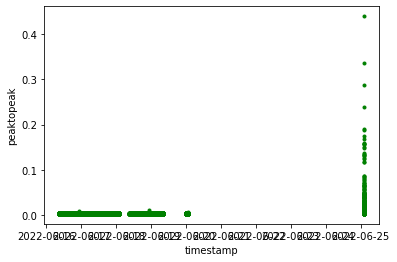

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('timestamp')
plt.ylabel('peaktopeak')
plt.scatter(df['timestamp'], df['peaktopeak'],color="green",marker='.')
#plt.scatter(df['label'], df['label'],color="blue",marker='.')

In [14]:
#Train Using Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split

In [15]:
import numpy as np

X = np.array(df['peaktopeak']).reshape(-1, 1)
y = np.array(df['label'])

In [18]:
#X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 50430 samples.
Testing set has 12608 samples.


In [19]:
from sklearn.svm import SVC
model = SVC()

In [20]:
model.fit(X_train, y_train)

SVC()

In [30]:
accuracy_score = model.score(X_test, y_test)
print ("Accuracy score for the trained model: {:.4f}.".format(accuracy_score))
# model.predict([[0.004]])

Accuracy score for the trained model: 0.9967.


In [31]:
y_predict = model.predict(X_test)

In [32]:
print(y_predict)

['0' '0' '0' ... '0' '1' '0']


In [29]:
# loading library
import pickle
# create an iterator object with write permission - model_SVC.pkl
with open('model_SVC', 'wb') as files:
    pickle.dump(model, files)

In [34]:
import pickle

# load saved model
with open('model_SVC' , 'rb') as f:
    SVC = pickle.load(f)

In [35]:
# check prediction

SVC.predict(X_test) # similar

array(['0', '0', '0', ..., '0', '1', '0'], dtype=object)